(75, 239)
(370, 370)


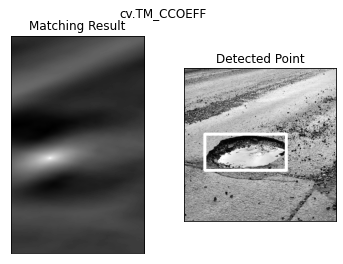

(75, 239)
(370, 370)


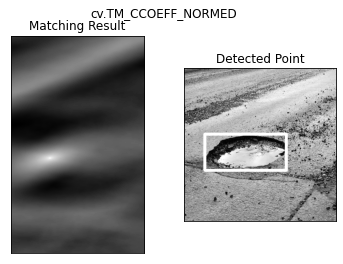

(257, 6)
(552, 137)


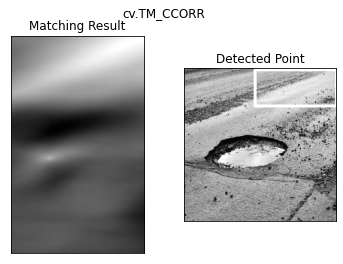

(75, 239)
(370, 370)


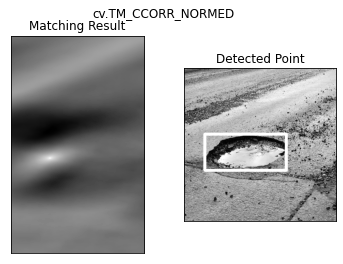

(75, 239)
(370, 370)


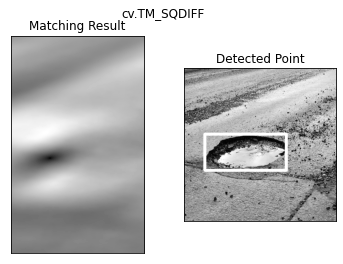

(75, 239)
(370, 370)


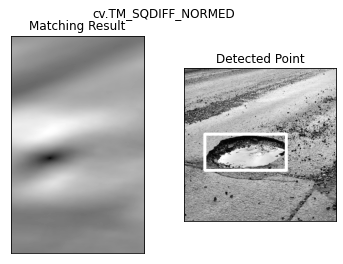

In [4]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('C:/Users/bist/Downloads/anas_haartrain/positive/rawdata/123.jpeg',0)
img2 = img.copy()
template = cv.imread('C:/Users/bist/Downloads/anas_haartrain/positive/rawdata/12.jpeg',0)
w, h = template.shape[::-1]
l=0
b=0
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR','cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
for meth in methods:
    
    img = img2.copy()
    method = eval(meth)
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    
    
    print(top_left)
    print(bottom_right)
    (x1,y1)=top_left
    (x2,y2)=bottom_right
    b=b+abs(x2-x1)
    l=l+abs(y2-y1)
    
    cv.rectangle(img,top_left, bottom_right, (0,255,0), 10)
    plt.subplot(121)
    plt.imshow(res)
    plt.title('Matching Result')
    plt.subplot(122)
    plt.imshow(img)
    plt.title('Detected points on image')
    plt.suptitle(meth)
    plt.show()
    
print("length of hole is",l/6,"cm")
print("width of hole is ",b/6,"cm")
    